In [96]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
#import csv files 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [98]:
#read data into dataframes
city_data_df = pd.read_csv(city_data_to_load)


In [99]:
ride_data_df = pd.read_csv(ride_data_to_load)


In [100]:
#merge the two data frames. both DF's have city column in common. add cityDF to end of rideDF
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

In [101]:
#create dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [102]:
#get total fare for each city
urban_sum_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_sum_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_sum_fare = rural_cities_df.groupby(["city"]).sum()["fare"]

In [103]:
#get total number of rides for each city type 
total_rides = (pyber_data_df.groupby(["type"]).count()["ride_id"])

In [104]:
#get total number of drivers for each city type
total_drivers = (city_data_df.groupby(["type"]).sum()["driver_count"])

In [105]:
#get total number of fares for each city type
total_fares = (pyber_data_df.groupby(["type"]).sum()["fare"])

In [106]:
#get average fare per ride
average_fare_ride = (pyber_data_df.groupby(["type"]).mean()["fare"])

In [107]:
#get average fare per driver 
average_fare_driver = total_fares/total_drivers

In [108]:
#create summary dataframe with necessary formatting and column names
summaryDF = pd.DataFrame({'total rides':total_rides, 'total drivers':total_drivers, 'total fares':total_fares.map("${:,.2f}".format), 'average fare per ride':average_fare_ride.map("${:,.2f}".format), 'average fare per driver':average_fare_driver.map("${:,.2f}".format)})
summaryDF


,total rides,total drivers,total fares,average fare per ride,average fare per driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [109]:
#rename columns of pyberdataDF
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [110]:
#set index of pyberdataDF to date column
pyber_data_df = pyber_data_df.set_index("Date")

In [111]:
#create a copy of pyberdataDF containing only city type and fare
pyber_data_df_copy = pyber_data_df[['City Type','Fare']].copy()

In [112]:
#create new DF via groupby
cityFareDF = pyber_data_df_copy.groupby(["City Type", "Date"]).sum()["Fare"].reset_index()

In [113]:
#create a pivot table DF 
pivotDF = pd.pivot_table(cityFareDF, values=["Fare"], index=["Date"], columns=['City Type'])
#convert index dates from string to datetime value so that resample will work
pivotDF.index = pd.to_datetime(pivotDF.index)

In [114]:
#loc dates we want to use for analysis
newPivotDF = pd.DataFrame(pivotDF.loc['2019-01-01':'2019-04-28'])



In [115]:
#bin the data by date. bin size 1 week. sum fare
stuffToPlot = newPivotDF.resample('W').sum()["Fare"]

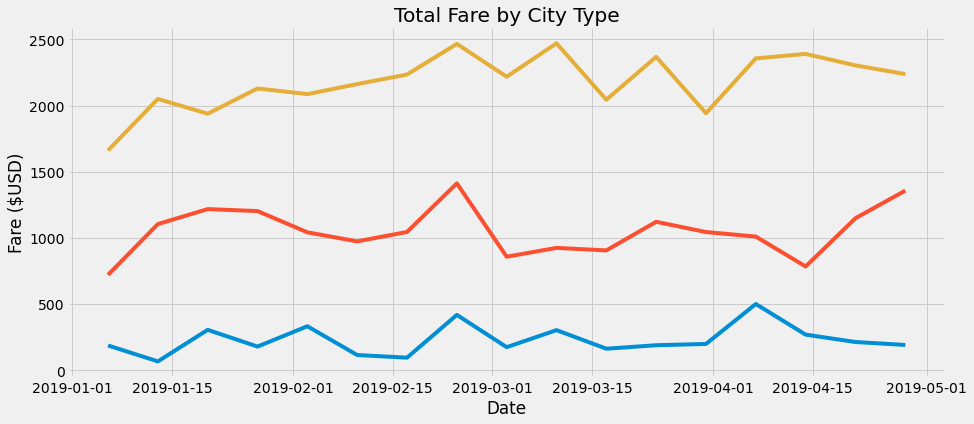

In [131]:
#output line chart 
fig, ax = plt.subplots(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Date")


ax.plot(stuffToPlot)
plt.savefig("analysis/Fig8.png")